In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

import plotly
import plotly.express as px
import plotly.graph_objects as go

# cufflinks => binds plotly and pandas
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [4]:
style.use('ggplot')

In [5]:
pyo.init_notebook_mode(connected=True) # connected notebook with pyplot
cf.go_offline()

In [6]:
df = pd.read_excel('Covid cases in India.xlsx')

In [7]:
df.drop(['S. No.'], axis=1, inplace=True)

In [8]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0


In [9]:
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [10]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [11]:
total_cases_overall = df['Total cases'].sum()

In [12]:
print('The total number of cases till now in India is:', total_cases_overall)

The total number of cases till now in India is: 729


In [13]:
df['Active Cases'] = df['Total cases'] - (df['Death'] + df['Cured'])

In [14]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


In [15]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [16]:
Total_Active_Cases = df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()

In [17]:
Total_Active_Cases

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [18]:
Total_Active_Cases.style.background_gradient(cmap='PuBu')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


# Graphical Representation of Data

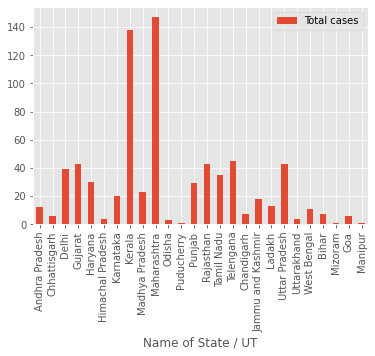

In [19]:
# plt.rcParams['figure.figsize']=12,15
df.plot(kind='bar', x='Name of State / UT', y='Total cases',)
plt.show()

# plotly
df.iplot(kind='bar', x='Name of State / UT', y='Total cases',)

## Matplotlib Visualization

<BarContainer object of 26 artists>

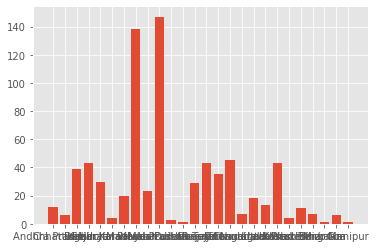

In [20]:
plt.bar(df['Name of State / UT'], df['Total cases'])

In [21]:
# plotly express => px
# it is wrapper of plotly
px.bar(df,x='Name of State / UT', y='Total cases')

# Scatter Plot

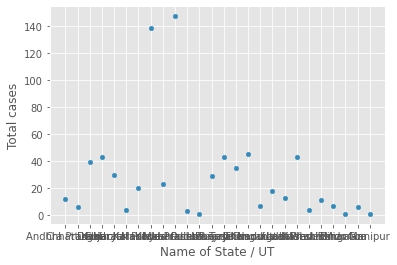

In [22]:
df.plot(kind='scatter',x='Name of State / UT', y='Total cases')

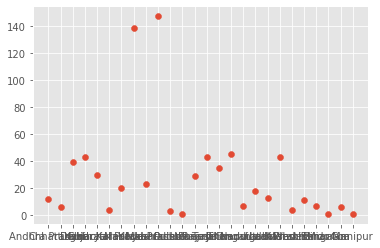

In [23]:
# matplotlib
plt.scatter(df['Name of State / UT'], df['Total cases'])

In [24]:
df.iplot(kind='scatter',x='Name of State / UT', y='Total cases', mode='markers+lines',colors='red',
        title='COVID_19 cases', xTitle='Name of State / UT', yTitle='Total cases')

px.scatter(df,x='Name of State / UT', y='Total cases')

# Object Oriented Visualization

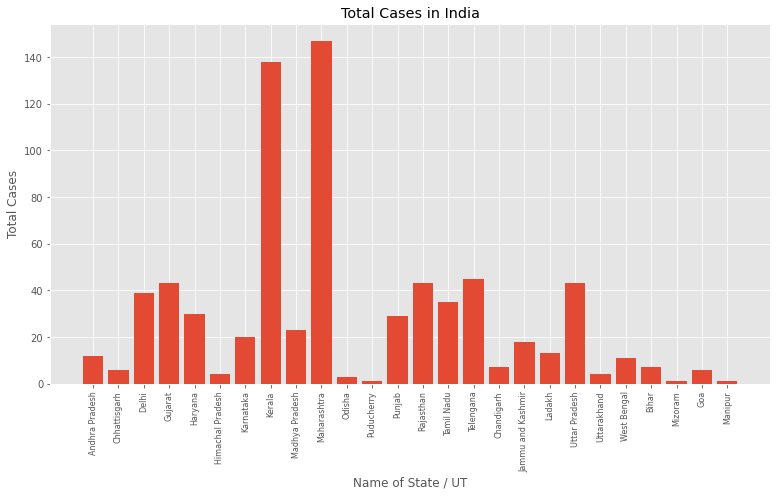

In [25]:
# Matplotlib
fig = plt.figure(figsize=(10,5))
# dpi => dot per inches
axes = fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'], df['Total cases'])
plt.xticks(df['Name of State / UT'], rotation='vertical', size=8)
axes.set_title('Total Cases in India')
axes.set_xlabel('Name of State / UT')
axes.set_ylabel('Total Cases')
plt.show()

In [26]:
# Plotly
fig = go.Figure()
# layout
fig.add_trace(go.Bar(x=df['Name of State / UT'], y=df['Total cases']))
fig.update_layout(title='Total Cases in India', xaxis=dict(title='Name of Stae / UT'), yaxis=dict(title='Total Cases'))


# Map

In [27]:
indian_cord = pd.read_excel('Indian Coordinates.xlsx')

In [28]:
indian_cord.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [29]:
# follium => to make circles on map
df_full = pd.merge(indian_cord,df,on='Name of State / UT')
# on => based on given col we need all the parameters

In [30]:
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [31]:

map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)


In [32]:
map

# How corona rising globally

In [36]:
dbd_india = pd.read_excel('per_day_cases.xlsx', parse_dates=True, sheet_name='India')
dbd_italy = pd.read_excel('per_day_cases.xlsx', parse_dates=True, sheet_name='Italy')
dbd_korea = pd.read_excel('per_day_cases.xlsx', parse_dates=True, sheet_name='Korea')
dbd_wuhan = pd.read_excel('per_day_cases.xlsx', parse_dates=True, sheet_name='Wuhan')


In [37]:
dbd_india.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


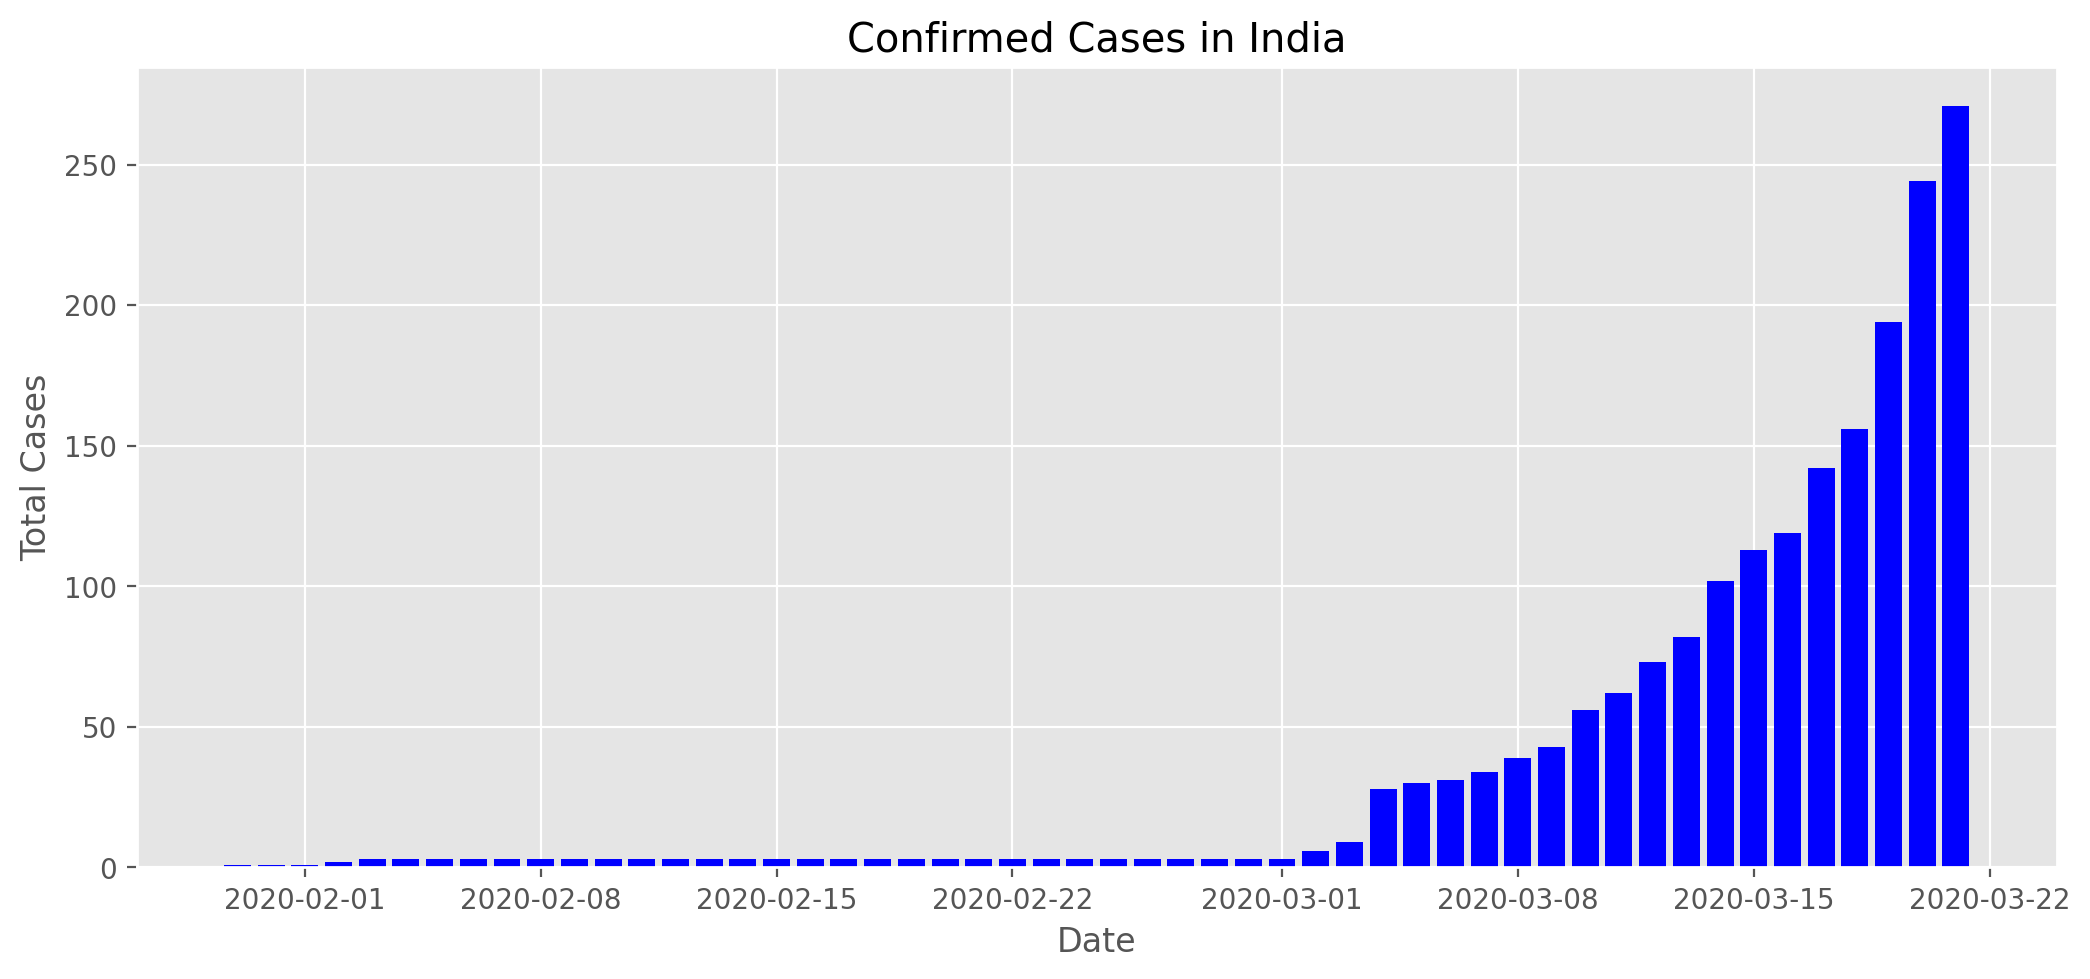

In [61]:
# matplotlib
fig = plt.figure(figsize=(12,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_india['Date'], dbd_india['Total Cases'], color='blue')
# plt.xticks(rotation='vertical', size=8)

axes.set_xlabel('Date')
axes.set_ylabel('Total Cases')
axes.set_title('Confirmed Cases in India')
plt.show()

In [64]:
# plotly express

fig = px.bar(dbd_india,dbd_india['Date'], dbd_india['Total Cases'], color='Total Cases', title='Total cases in India')
fig

In [66]:
fig = px.bar(dbd_italy, dbd_italy['Date'], dbd_italy['Total Cases'], color='Total Cases', title='Total cases in Italy')
fig.show()

fig = px.bar(dbd_korea,dbd_korea['Date'], dbd_korea['Total Cases'], color='Total Cases', title='Total cases in Korea')
fig.show()

fig = px.bar(dbd_wuhan, dbd_wuhan['Date'], dbd_wuhan['Total Cases'], color='Total Cases', title='Total cases in Wuhan')
fig.show()

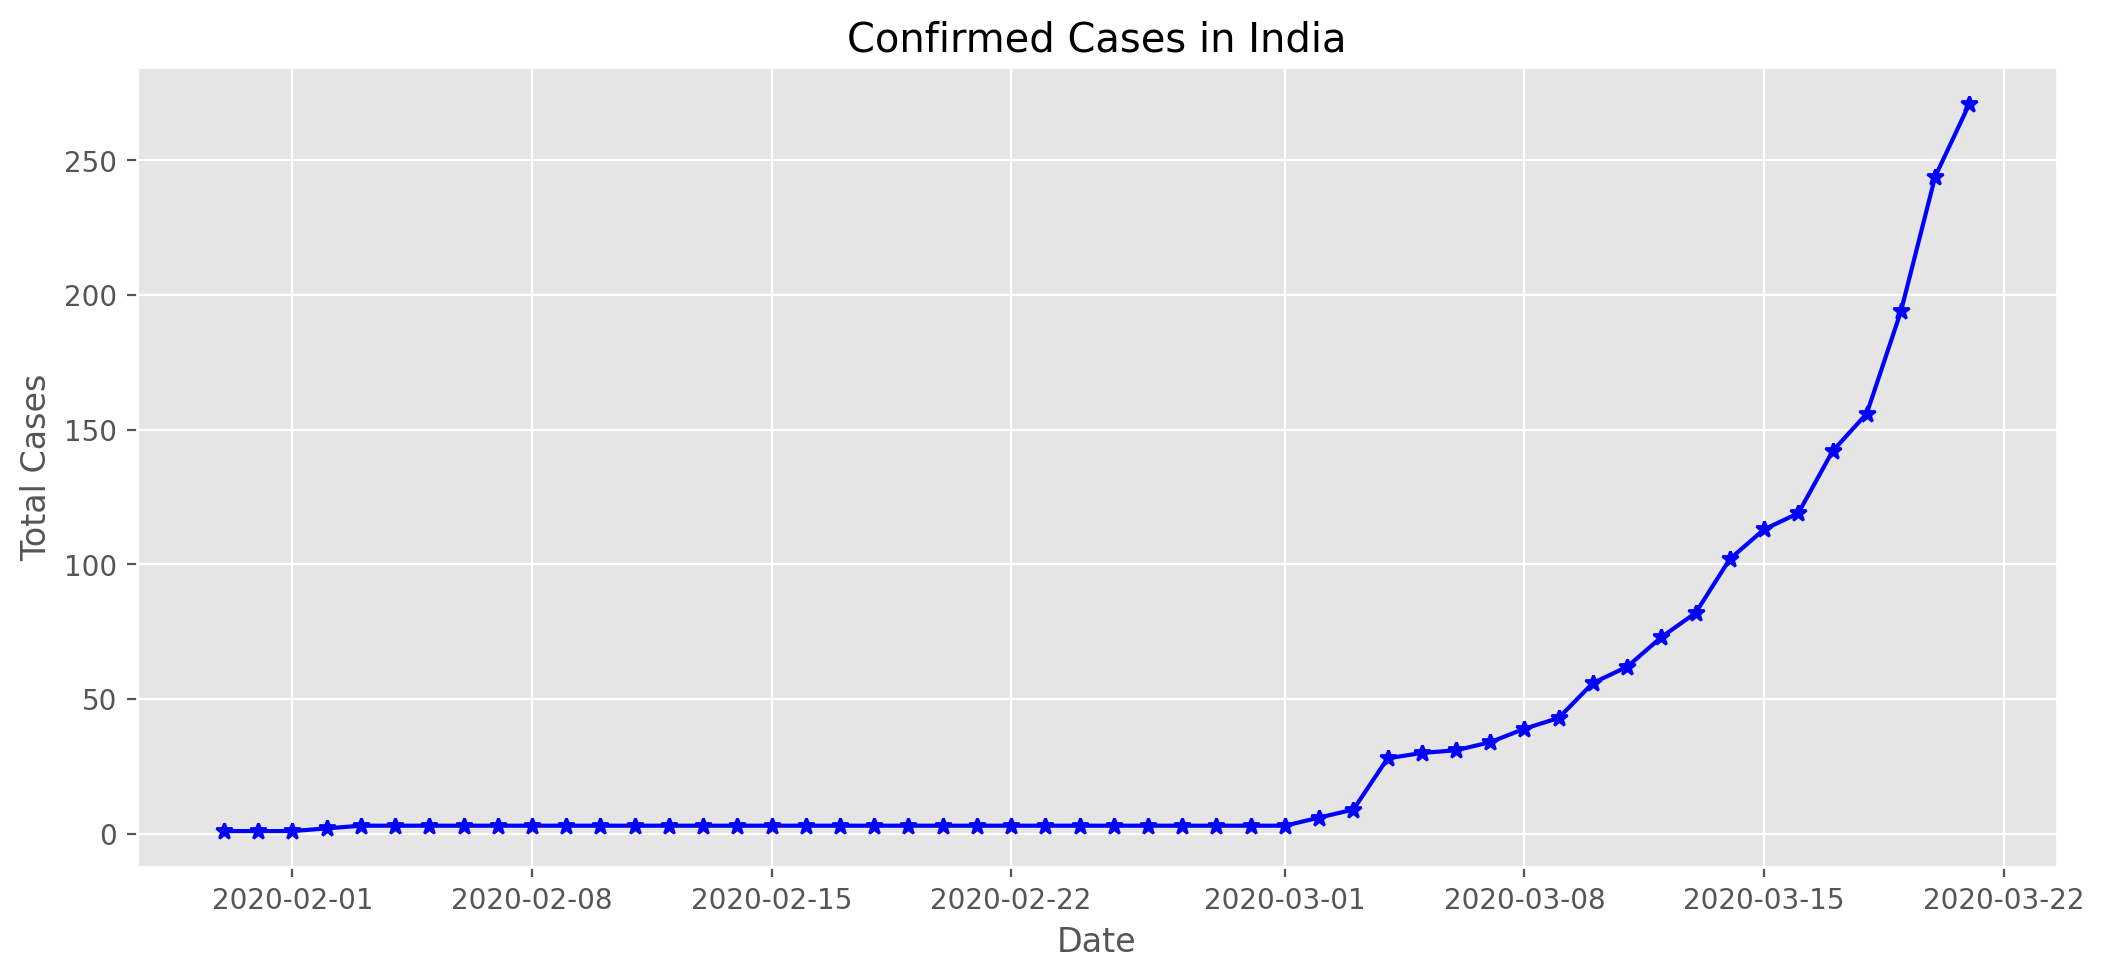

In [70]:
# matplotlib
fig = plt.figure(figsize=(12,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(dbd_india['Date'], dbd_india['Total Cases'], color='blue', marker='*')
# plt.xticks(rotation='vertical', size=8)

axes.set_xlabel('Date')
axes.set_ylabel('Total Cases')
axes.set_title('Confirmed Cases in India')
plt.show()

# plotly express

fig = px.scatter(dbd_india,dbd_india['Date'], dbd_india['Total Cases'], color='Total Cases', title='Total cases in India')
fig

In [72]:
# plotly
dbd_india.iplot(kind='scatter', x='Date', y='Total Cases', mode='lines+markers')

In [74]:
# plotly graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_india['Date'], y=dbd_india['Total Cases'], mode='lines+markers'))

In [80]:
from plotly.subplots import make_subplots

fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_korea['Date'], y=dbd_korea['Total Cases'],
                    marker=dict(color=dbd_korea['Total Cases'], coloraxis='coloraxis')),1,1)

fig.add_trace(go.Bar(x=dbd_italy['Date'], y=dbd_italy['Total Cases'],
                    marker=dict(color=dbd_italy['Total Cases'], coloraxis='coloraxis')),1,2)

fig.add_trace(go.Bar(x=dbd_india['Date'], y=dbd_india['Total Cases'],
                    marker=dict(color=dbd_india['Total Cases'], coloraxis='coloraxis')),2,1)

fig.add_trace(go.Bar(x=dbd_wuhan['Date'], y=dbd_wuhan['Total Cases'],
                    marker=dict(color=dbd_wuhan['Total Cases'], coloraxis='coloraxis')),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, title_text='Total cases in 4 countries')
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [81]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Scatter(x=dbd_korea['Date'], y=dbd_korea['Total Cases'],
                    marker=dict(color=dbd_korea['Total Cases'], coloraxis='coloraxis')),1,1)

fig.add_trace(go.Scatter(x=dbd_italy['Date'], y=dbd_italy['Total Cases'],
                    marker=dict(color=dbd_italy['Total Cases'], coloraxis='coloraxis')),1,2)

fig.add_trace(go.Scatter(x=dbd_india['Date'], y=dbd_india['Total Cases'],
                    marker=dict(color=dbd_india['Total Cases'], coloraxis='coloraxis')),2,1)

fig.add_trace(go.Scatter(x=dbd_wuhan['Date'], y=dbd_wuhan['Total Cases'],
                    marker=dict(color=dbd_wuhan['Total Cases'], coloraxis='coloraxis')),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, title_text='Total cases in 4 countries')
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

# World COVID analysis

In [84]:
df = pd.read_csv('covid_19_data.csv', parse_dates=['Last Update'])

In [85]:
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'},inplace=True)

In [86]:
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [92]:
df.query('Country=="India"').head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0


In [107]:
df.groupby('Country').sum()

,SNo,Confirmed,Deaths,Recovered
Country,,,,
Azerbaijan,2664,1.0,0.0,0.0
"('St. Martin',)",4675,2.0,0.0,0.0
Afghanistan,78467,74.0,0.0,0.0
Albania,35297,160.0,5.0,0.0
Algeria,75424,286.0,10.0,40.0
...,...,...,...,...
Uzbekistan,5887,1.0,0.0,0.0
Vatican City,16496,4.0,0.0,0.0
Venezuela,11398,12.0,0.0,0.0


In [114]:
df[df['Country'] == 'India'].sum().to_frame()
df.groupby(df['Country'] == 'India').sum()

,SNo,Confirmed,Deaths,Recovered
Country,,,,
False,17240131,3446818.0,109699.0,1279123.0
True,108864,792.0,8.0,102.0


In [117]:
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()
death = df.groupby('Date')['Deaths'].sum().reset_index()
rec = df.groupby('Date')['Recovered'].sum().reset_index()

In [120]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', 
                         name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=death['Date'], y=death['Deaths'], mode='lines+markers', 
                         name='Deaths',line=dict(color='red',width=2)))

fig.add_trace(go.Scatter(x=rec['Date'], y=rec['Recovered'], mode='lines+markers', 
                         name='Recovered',line=dict(color='green',width=2)))

In [122]:
df_confirmed=pd.read_csv('time_series_covid_19_confirmed.csv')

In [123]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)

In [125]:
df_latlong=pd.merge(df,df_confirmed,on=['Country','Province/State'])

In [126]:
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,5879,03/15/2020,NaN,Saint Vincent and the Grenadines,2020-03-14 16:33:03,1.0,0.0,0.0,12.9843,-61.2872,...,0,0,0,0,0,0,0,0,0,1
3286,5625,03/14/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3287,5881,03/15/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3288,5628,03/14/2020,"Virgin Islands, U.S.",US,2020-03-14 16:15:18,1.0,0.0,0.0,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,1


In [129]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",
                      hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",
                      color_continuous_scale="Portland",radius=7,zoom=0,height=700)

fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
